<a href="https://colab.research.google.com/github/matheusleusin/sdsphd19_matheusleusin/blob/master/Portfolio_1_Tuesday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Tuesday

We will be using the turnover dataset 

https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv'

for this portfolio to do 3 things:

## Unsupervised ML

- Prepare the dataset (select the columns that are useful)
- Preprocess (Scale)
- Reduce dimensionality and perhaps make a scatterplot of the data
- Examine the reduced data

## Supervised ML

- Preprocess the data
- Try to predict "churn" using a simple model (Logistic Regression)
- Try a more advanced model (e.g. Random Forest)
- Evaluate your model
- Predict "satisfaction" (!!! This is a regression model)
- Evaluate the regression model



In [0]:
import pandas as pd

In [2]:
!pip install -qq -U matplotlib
import pandas as pd #Pandas handles tabular data
pd.set_option('display.float_format', lambda x: '%.3f' % x) # turn off scientific notation and too much decimal blah
import matplotlib.pyplot as plt # standard plotting library
import numpy as np #Numpy for linear algebra & co
import seaborn as sns # For pretty dataviz
sns.set_style("darkgrid") 

     |████████████████████████████████| 13.1MB 181kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [0]:
turnover = pd.read_csv('https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv')

In [0]:
#Prepare the dataset (select the columns that are useful) and preprocess (Scale)

In [0]:
salary_mapper ={'low':0, 'medium':1, 'high':2}

In [0]:
turnover['salary_recode'] = turnover.salary.map(salary_mapper)

In [0]:
dep_matrix = pd.get_dummies(turnover.department)
turnover_all = pd.concat([turnover, dep_matrix], axis = 1)

In [0]:
turnover_all.drop(['department', 'churn', 'salary'], axis = 1, inplace = True)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(turnover_all)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 18)

In [0]:
X_reduced = pca.fit_transform(X_scaled)

In [0]:
#Reduce dimensionality and perhaps make a scatterplot of the data

In [0]:
plot_data = pd.DataFrame({'evr': pca.explained_variance_ratio_, 'cumsum_evr': np.cumsum(pca.explained_variance_ratio_)}).stack()

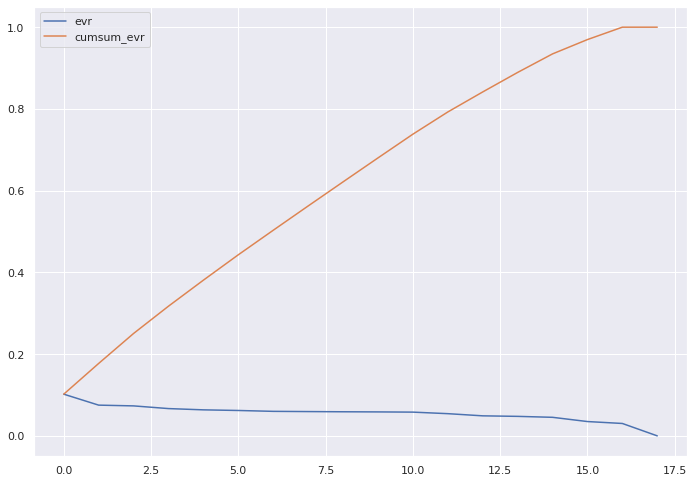

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [15]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

In [0]:
pcscores = pd.DataFrame(X_reduced)
loadings = pd.DataFrame(pca.components_, columns=turnover_all.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

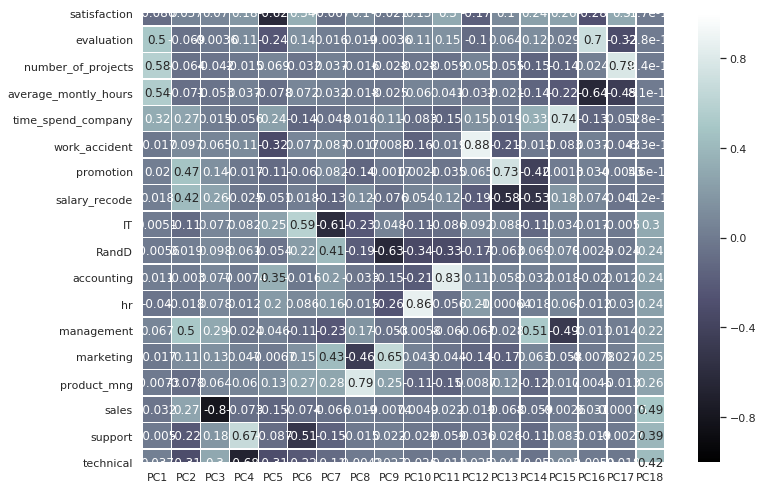

In [17]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

In [0]:
#Examine the reduced data

#Answer: it doesn't look like we can't reduce the dimensionality without loosing too much important data; 

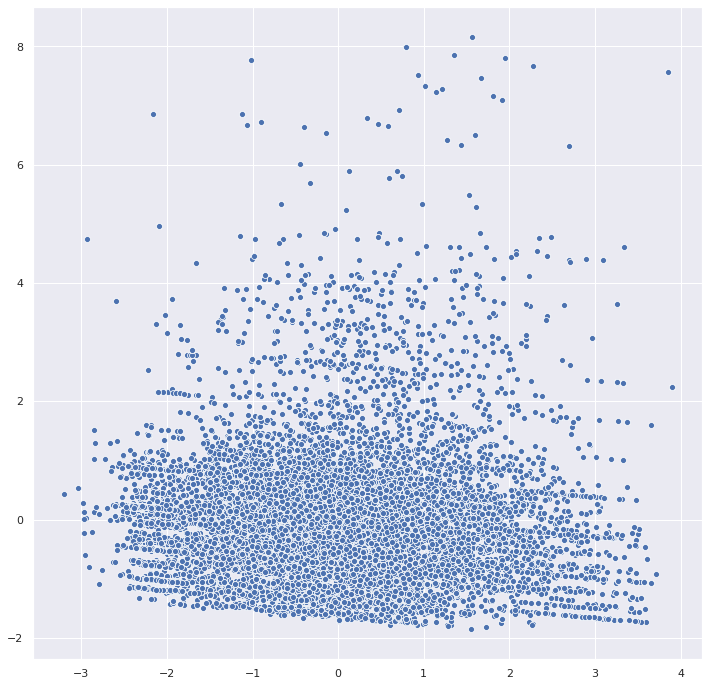

In [19]:
#Plot in our points
plt.figure(figsize=(12,12))
g = sns.scatterplot(X_reduced[:,0], X_reduced[:,1],
                    legend='full', palette='viridis')

legend = g.get_legend()

In [0]:
#Supervised ML
#Preprocess the data
#I'll start from scratch just to be sure

In [0]:
import pandas as pd
turnover = pd.read_csv('https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv')
salary_mapper ={'low':0, 'medium':1, 'high':2}
turnover['salary_recode'] = turnover.salary.map(salary_mapper)
dep_matrix = pd.get_dummies(turnover.department)
turnover_all = pd.concat([turnover, dep_matrix], axis = 1)
turnover_all.drop(['department', 'churn', 'salary'], axis = 1, inplace = True)

In [0]:
# Select the (independant) features that we are going to use to train the model
X = turnover_all.loc[:,'satisfaction':'technical']

In [0]:
# Define the dependant variabel / target to predict (world region)
y = turnover['churn']

In [0]:
# Load and instantiate a LabelEncoder that will turn our text labels (regions into indices)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [0]:
# Transform labels into indices by passing y to the encoder
y_enc = encoder.fit_transform(y)

In [0]:
#simple model (Logistic Regression):

In [0]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
# Apply the scaler to our X-features
X_scaled = scaler.fit_transform(X)

In [0]:
# Split the data using the train_test_split module.
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size = 0.2, random_state = 42)

In [0]:
# Import modules that we are going to use for all models

# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluatoion of performance
from sklearn.metrics import classification_report

In [31]:
# Import and instantiate the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

[0.78916667 0.795      0.79416667 0.8025     0.78449354]
0.7886666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [0]:
#already good for a simple model.
# random forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

[0.98875    0.98708333 0.98583333 0.98791667 0.98999583]
0.986


In [0]:
#even better (maybe I could've reduced the dimensionality if the prediction is so good)

In [0]:
#predict satisfaction

In [0]:
y = turnover['satisfaction']

In [0]:
# Select the (independant) features that we are going to use to train the model
X = turnover_all.loc[:,'evaluation':'technical']

In [0]:
# Transform labels into indices by passing y to the encoder
y_enc = encoder.fit_transform(y)

In [0]:
# Apply the scaler to our X-features
X_scaled = scaler.fit_transform(X)

In [0]:
# Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size = 0.2, random_state = 42)

In [41]:
# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

[0.27727646 0.2727649  0.27576137 0.27276542 0.28625793]
0.31533333333333335


In [0]:
#evaluate the model:
# the model for satisfaction does not perform well. Predictin values is harder than predicting dummies.
#It was definetly good not to reduce the dimensionality, once that this would've made the already bet predictions for satisfaction get even worse...